### Importing Modules (p514)

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Brief Review of Machine Learning (p515)

### Regression (p516)

In [2]:
# generate data with 50 features out of which only 10 
# feature are informative
X_all, y_all = datasets.make_regression(
    n_samples=50,
    n_features=50,
    n_informative=10
)

In [3]:
# split the dataset into two equal size
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_all, y_all, train_size=0.5)

In [4]:
# create a LinearRegression instance to peform a regression
model = linear_model.LinearRegression()

In [5]:
# invoke the fit method to fit the model to the data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# evaluate the model for a given set of features
def sse(resid):
    return np.sum(resid**2)
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

2.168370369173583e-24

In [7]:
# overfitted model is at suitable for predicting unseen data
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

510622.8543552515

In [8]:
# compute R-squared score for training dataset
print(model.score(X_train, y_train))

# compute R-squared score for testing dataset
print(model.score(X_test, y_test))

1.0
0.3106734133624849


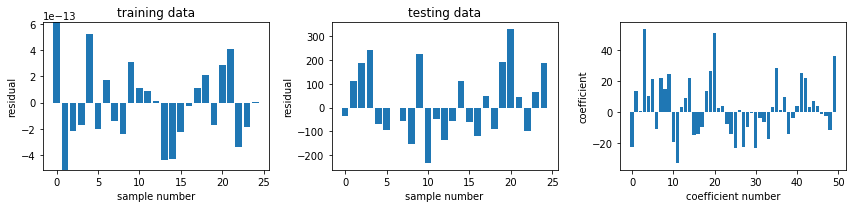

In [9]:
# plot the residuals of the training and testing datasets and
# inspect the values of the coefficients and the residuals
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    
    return fig, axes

fig, ax = plot_residuals_and_coeff(
    resid_train, 
    resid_test, 
    model.coef_
)

In [10]:
# perform Ridge regression to fit a gregression problem in a way
# that avoid overfitting as much as possible
model = linear_model.Ridge(alpha=2.5)

In [11]:
# fit the regression model to the data
model.fit(X_train, y_train)

Ridge(alpha=2.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
# compute the model predictions for the training dataset
# and compute the corresponding SSE
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

3107.472650406344

In [13]:
# compute the model predictions for the testing dataset
# and compute the corresponding SSE
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

504671.1366754077

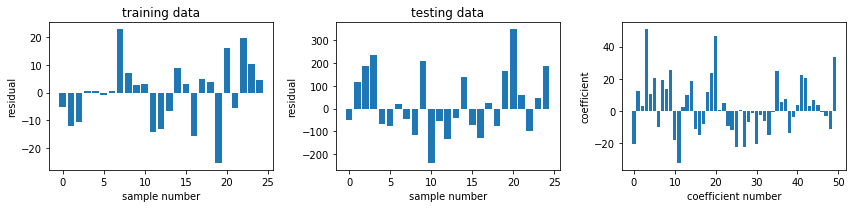

In [14]:
# plot the training/testing residuals and the model parameters
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [15]:
# perform L1-regularized LASSO regression
model = linear_model.Lasso(alpha=1.0)
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
# compute the model predictions for the training dataset
# and compute the corresponding SSE
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

680.3570676616193

In [17]:
# compute the model predictions for the testing dataset
# and compute the corresponding SSE
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

107751.04191193814

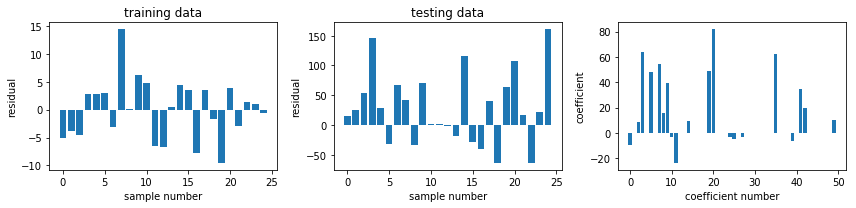

In [18]:
# plot the training/testing residuals and the model parameters
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [19]:
# create a range of a values that span several orders of magnitude
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
# loop through the a values and perform the LASSO regression
for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = sse(y_train - model.predict(X_train))
    sse_test[n] = sse(y_test - model.predict(X_test))

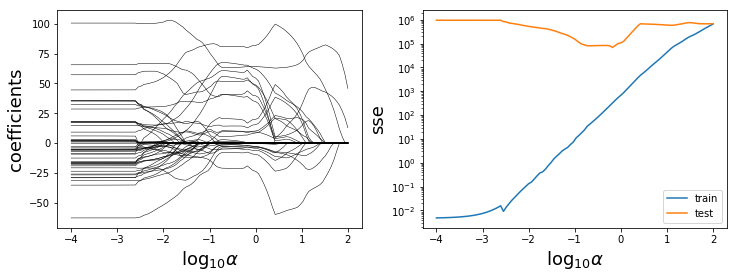

In [22]:
# plot the coefficients and the SSE for the training and testing datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

axes[1].semilogy(np.log10(alphas), sse_train, label="train")
axes[1].semilogy(np.log10(alphas), sse_test, label="test")
axes[1].legend(loc=0)

axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coefficients", fontsize=18)
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18);

In [23]:
# carry out the process of testing a regularized regression
# with several values of a
model = linear_model.LassoCV()
model.fit(X_all, y_all)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [24]:
# access the value of regularization strength parameter a
# selected through the cross-validation search
model.alpha_

0.09786576508398308

In [25]:
# compute the model predictions for the training dataset
# and compute the corresponding SSE
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

3.0739631930173847

In [26]:
# compute the model predictions for the testing dataset
# and compute the corresponding SSE
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

2.676805610714207

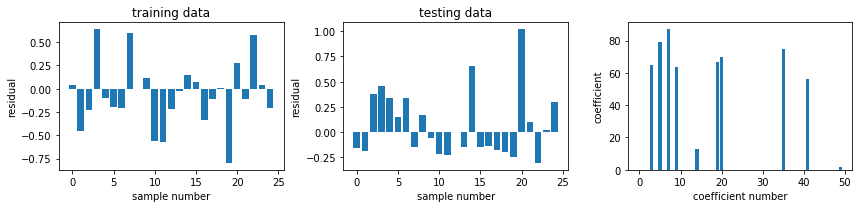

In [27]:
# plot the training/testing residuals and the model parameters
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

In [28]:
# perform an elastic-net regression with cross-validation
model = linear_model.ElasticNetCV()
model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [29]:
# access the value of regularization parameters a and b
model.alpha_, model.l1_ratio

(0.2944552544833986, 0.5)

In [30]:
# compute the model predictions for the training dataset
# and compute the corresponding SSE
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
sse_train

6400.155982275518

In [31]:
# compute the model predictions for the testing dataset
# and compute the corresponding SSE
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
sse_test

498597.5189108685

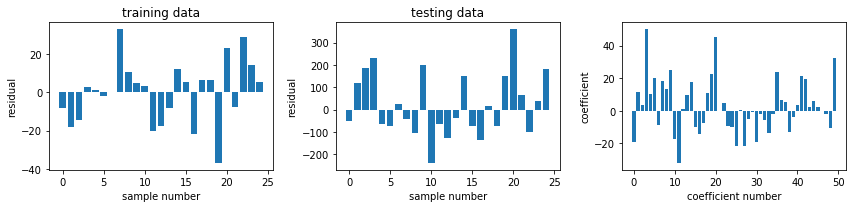

In [32]:
# plot the training/testing residuals and the model parameters
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)

### Classification (p529)

In [33]:
# load the IRIS data
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [34]:
# access metadata
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [35]:
# access the actual dataset
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [36]:
# split the dataset into a training and testing part
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(
        iris.data, 
        iris.target,
        train_size=0.7
)

In [37]:
# create a classifier instance
classifier = linear_model.LogisticRegression()

In [38]:
# train the classifier by passing 
# the feature and target variables
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# predict the class for new observations
y_test_pred = classifier.predict(X_test)

In [40]:
# analyze the performance/accuracy of classifiers
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      0.93      0.90        15
           2       0.94      0.89      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [41]:
# obtain the confusion matrix
metrics.confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  2, 17]])

In [42]:
# count unique values per category
np.bincount(y_test)

array([11, 15, 19])

In [43]:
# use a decision tree when creating a classifier instance
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  4, 15]])

In [44]:
# create a numpy array with training size ratios
train_size_vec = np.linspace(0.1, 0.9, 30)

In [45]:
# create a list of classifier classes
classifiers = [
    tree.DecisionTreeClassifier,
    neighbors.KNeighborsClassifier,
    svm.SVC,
    ensemble.RandomForestClassifier
]

In [46]:
# create an array to store the diagonals of the confusion matrix
cm_diags = np.zeros(
    (3, len(train_size_vec), len(classifiers)),
    dtype=float
)

In [47]:
# loop over each training size ratio and classifier
# train the classifier for each combination
# predict the values of the testing data
# compute the confusion matrix
# store its diagonal divided by the ideal values

for n, train_size, in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = \
        model_selection.train_test_split(
            iris.data, 
            iris.target, 
            train_size=train_size
        )
    
    for m, Classifier in enumerate(classifiers):
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_p = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test, y_test_p).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

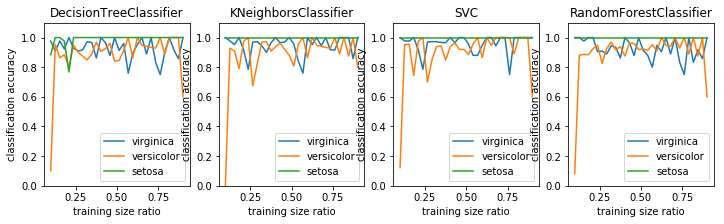

In [48]:
# plot the resulting classification accuracy for each classifier
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))
for m, Classifier in enumerate(classifiers):
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.
    target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.
    target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.
    target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_ylabel("classification accuracy")
    axes[m].set_xlabel("training size ratio")
    axes[m].legend(loc=4);

### Clustering (p535)

In [49]:
# store the feature and target data separately
X, y = iris.data, iris.target

In [50]:
# specify the number of clusters (priori)
n_clusters = 3

In [51]:
# create an instance of Kmeans class
clustering = cluster.KMeans(n_clusters=n_clusters)

In [52]:
# perform the computation
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
# obtain the clustering result with the training feature dataset
y_pred = clustering.predict(X)
y_pred[::8]

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [54]:
# compare the obtained clustering with the supervised classification
y[::8]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [55]:
# rename the elements
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1
y_pred[::8]

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [56]:
# summarize the overlaps between the supervised and unsupervised
# classification
metrics.confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]])

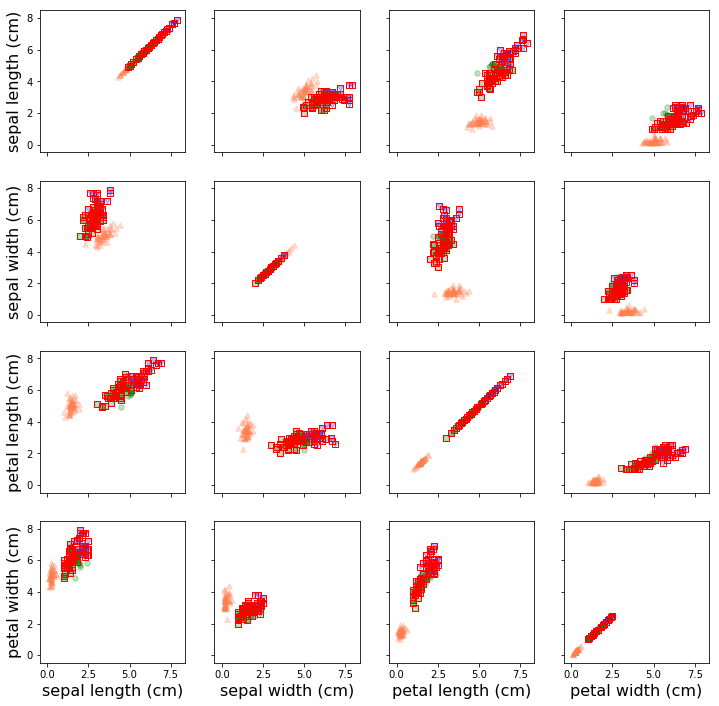

In [57]:
# plot scatter plot for each pair of features
N = X.shape[1]
fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)
colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]

for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(
                X[:, m][mask], X[:, n][mask], s=30,
                marker=markers[p], color=colors[p], alpha=0.25
            )
        for idx in np.where(y != y_pred):
            axes[m, n].scatter(
                X[idx, m], X[idx, n], s=30,
                marker="s", edgecolor="red", facecolor=(1,1,1,0)
            )
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16);